## Import

In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD

import seaborn as sns
import matplotlib.pyplot as plt

import os

import warnings
warnings.filterwarnings(action='ignore')

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

# Gdrive

In [2]:
from google.colab import drive
import os
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
os.chdir('/content/drive/MyDrive/데이콘/신용카드 사기 거래 탐지 AI 경진대회')

In [4]:
os.getcwd()

'/content/drive/MyDrive/데이콘/신용카드 사기 거래 탐지 AI 경진대회'

In [5]:
os.listdir()

['open.zip의 사본',
 'open',
 'submit.csv',
 'sequence_api.png',
 'func_api.png',
 '2022 07 20',
 '[Baseline]_Anomaly Detection with IsolationForest (비지도학습).ipynb',
 '[비지도학습] creditcard_fraud.ipynb',
 '[EDA]_Anomaly Detection with IsolationForest (비지도학습).ipynb',
 'Histograms.png']

## Data Load

In [6]:
train_df = pd.read_csv('./open/train.csv') # Train
print(train_df.shape)
print(type(train_df))
train_df.tail()

(113842, 31)
<class 'pandas.core.frame.DataFrame'>


,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
113837,284796,-12.516732,10.187818,-8.476671,-2.510473,-4.586669,-1.394465,-3.632516,5.498583,4.893089,8.655320,-1.052365,2.834865,1.088141,1.288401,-0.931503,1.067864,0.586179,-0.085524,-0.571605,3.490065,-0.944759,-1.565026,0.890675,-1.253276,1.786717,0.320763,2.090712,1.232864,-0.169496,1.034857
113838,284797,1.884849,-0.143540,-0.999943,1.506772,-0.035300,-0.613638,0.190241,-0.249058,0.666458,0.120908,-1.134176,0.677729,0.345928,0.002019,-0.679626,-0.549982,-0.199950,-0.420551,-0.283278,-0.153997,0.144008,0.634646,-0.042114,-0.053206,0.316403,-0.461441,0.018265,-0.041068,0.530986,1.034881
113839,284798,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,-0.284708,-0.612982,-0.066655,-0.732987,0.237948,-0.293959,-0.245496,-0.174846,-0.891169,-0.290491,-0.139512,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,-0.230699,1.034904
113840,284802,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,-0.657422,0.644837,0.190916,-0.546329,-0.731707,-0.808036,0.599628,0.070441,0.373110,0.128904,0.000676,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,-0.269825,1.034939
113841,284803,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.296653,1.034951


In [7]:
val_df = pd.read_csv('./open/val.csv') # Validation
print(val_df.shape)
val_df.tail()

(28462, 32)


,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,Class
28457,284769,-0.546378,1.433992,-0.313252,0.926044,0.522388,-0.565669,1.066075,0.269799,-1.099446,-0.077753,0.534689,0.748099,-0.338301,1.018502,-1.058923,-0.914161,0.143397,0.154285,1.000673,0.007075,0.228159,0.778817,-0.175451,0.030397,0.018381,-0.395994,0.301655,0.173585,0.202753,1.034622,0
28458,284779,-0.764523,0.588379,-0.907599,-0.418847,0.901528,-0.760802,0.758545,0.414698,-0.730854,-1.245088,0.874312,0.162691,-1.011819,-0.317789,-0.887823,0.482847,0.681412,0.486991,-0.022064,0.024870,0.003530,-0.431876,0.141759,0.587119,-0.200998,0.267337,-0.152951,-0.065285,0.810452,1.034693,0
28459,284790,-0.446951,1.302212,-0.168583,0.981577,0.578957,-0.605641,1.253430,-1.042610,-0.417116,0.076605,-1.291228,-0.690868,-1.481724,0.753473,-0.191141,-1.129904,0.319074,-0.201862,0.744416,-0.203306,0.851800,0.305268,-0.148093,-0.038712,0.010209,-0.362666,0.503092,0.229921,0.537972,1.034763,0
28460,284801,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,0.267772,0.523316,0.559047,-0.834660,0.626211,-0.541494,0.225361,-0.605252,-0.163049,0.561695,-0.256922,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,-0.269964,1.034928,0
28461,284806,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.167680,1.034975,0


In [8]:
# null값 없음
# print(train_df.isnull().sum())
# print(val_df.isnull().sum())

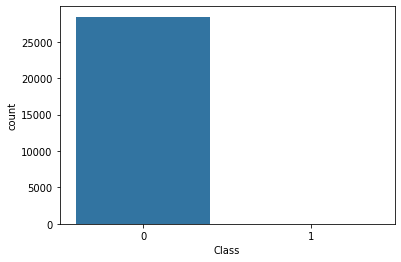

In [9]:
# Target Class 분포
sns.countplot(x='Class', data=val_df);

In [10]:
val_df['Class'].value_counts(normalize=True)

0    0.998946
1    0.001054
Name: Class, dtype: float64

In [11]:
train_df.describe()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
count,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,1.138420e+05,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000
mean,142025.527837,0.000197,0.001289,0.009717,-0.004169,0.000475,0.005141,0.005769,-0.002451,-0.002107,0.005209,-0.001686,0.003944,0.002043,0.004397,-0.000500,0.002905,0.003397,0.001114,0.000300,-0.000500,-0.001242,4.088347e-07,-0.001317,-0.000884,0.001680,-0.000293,-0.000234,-0.000508,0.927253,0.116232
std,82248.545392,1.951060,1.651064,1.496916,1.412633,1.367533,1.330583,1.204111,1.185504,1.095415,1.071337,1.014689,0.977039,0.994908,0.933753,0.915666,0.864903,0.808552,0.830763,0.814542,0.763326,0.722001,7.238291e-01,0.636061,0.605854,0.520069,0.480979,0.399505,0.356130,3.412933,0.558161
min,3.000000,-56.407510,-72.715728,-32.454198,-5.600607,-42.147898,-26.160506,-41.506796,-50.943369,-13.434066,-24.403185,-4.682931,-18.553697,-3.844974,-15.623187,-4.152532,-13.303888,-21.297906,-8.668815,-4.932733,-28.009635,-22.757540,-8.887017e+00,-44.807735,-2.824849,-10.295397,-1.855355,-9.895244,-9.617915,-0.307413,-0.994972
25%,70796.750000,-0.923479,-0.595602,-0.883877,-0.853728,-0.689853,-0.766094,-0.552071,-0.209492,-0.647477,-0.533477,-0.763105,-0.402650,-0.647334,-0.423962,-0.584307,-0.467574,-0.486154,-0.497362,-0.456712,-0.211935,-0.229710,-5.402665e-01,-0.162180,-0.355582,-0.315470,-0.326160,-0.070847,-0.053249,-0.230560,-0.360304
50%,141722.000000,0.012074,0.066390,0.183868,-0.019359,-0.054060,-0.272436,0.039036,0.020970,-0.052157,-0.090810,-0.034405,0.141434,-0.010847,0.052157,0.048524,0.066434,-0.066939,-0.004633,0.004657,-0.062891,-0.030281,8.345807e-03,-0.012261,0.040573,0.018278,-0.052815,0.001502,0.011158,-0.000699,-0.002590
75%,213359.500000,1.315373,0.801687,1.037120,0.742208,0.614214,0.405285,0.568750,0.328303,0.590705,0.455287,0.739737,0.619635,0.663362,0.494116,0.646540,0.525120,0.397480,0.500335,0.461655,0.133381,0.186001,5.287508e-01,0.147474,0.438225,0.353989,0.240838,0.091279,0.077851,0.768532,0.640653
max,284803.000000,2.454930,21.467203,4.187811,16.491217,34.801666,23.917837,44.054461,20.007208,10.392889,15.331742,10.446847,4.318071,4.569009,7.518403,5.784514,8.289890,9.253526,4.295648,4.715142,26.237391,27.202839,8.361985e+00,22.528412,4.022866,7.519589,3.119295,11.135740,33.847808,180.101027,1.034951


In [12]:
val_df.describe()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,Class
count,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000
mean,142549.840138,0.004967,0.002014,0.001414,0.001893,-0.003969,-0.017730,0.005556,0.009023,-0.004905,-0.002299,0.004007,0.002480,0.004170,0.012299,0.003177,0.004913,0.007552,0.005733,0.000146,0.001928,0.000013,0.001224,0.001490,0.001355,0.002284,0.000520,-0.000520,-0.000265,0.924010,0.119916,0.001054
std,82252.851474,1.930640,1.605198,1.499749,1.405139,1.335147,1.292214,1.165132,1.103538,1.090843,1.084560,1.016507,0.990731,1.000558,0.938752,0.913747,0.864289,0.821528,0.833280,0.808897,0.729583,0.700859,0.721350,0.588076,0.603181,0.526864,0.484804,0.394235,0.304284,3.347555,0.558246,0.032449
min,10.000000,-29.516123,-38.305310,-30.177317,-5.071241,-21.577019,-16.172614,-31.197329,-26.278007,-9.462573,-22.187089,-4.453853,-16.060306,-3.848943,-14.952981,-4.391307,-12.675269,-20.740664,-8.153668,-4.197145,-18.292308,-14.004410,-8.555808,-25.356744,-2.807897,-6.035054,-1.596493,-9.793568,-8.364853,-0.307413,-0.994878,0.000000
25%,71260.000000,-0.915525,-0.598053,-0.873022,-0.852444,-0.698010,-0.774920,-0.546290,-0.210941,-0.642760,-0.540463,-0.755867,-0.408285,-0.638741,-0.411374,-0.572378,-0.461673,-0.474047,-0.491693,-0.463059,-0.212876,-0.226196,-0.542624,-0.160418,-0.352310,-0.322098,-0.328638,-0.071787,-0.052361,-0.226927,-0.357884,0.000000
50%,142683.500000,0.023586,0.075470,0.175784,-0.021619,-0.052780,-0.280742,0.046280,0.022622,-0.066623,-0.099386,-0.033527,0.137370,-0.012317,0.059680,0.053606,0.070931,-0.066174,0.000890,0.000397,-0.062481,-0.029430,0.008401,-0.011372,0.040076,0.016684,-0.049583,0.000488,0.012138,0.005589,0.002156,0.000000
75%,213612.750000,1.315578,0.803463,1.011563,0.739044,0.598712,0.377266,0.566825,0.323836,0.596308,0.452763,0.743699,0.618721,0.666392,0.500190,0.648310,0.521601,0.399337,0.509625,0.462772,0.131592,0.186905,0.528163,0.146094,0.441402,0.352930,0.241051,0.089100,0.080822,0.778278,0.641828,0.000000
max,284806.000000,2.411769,16.497472,4.226108,12.114672,24.345310,12.128950,26.237722,12.431140,7.937413,12.161890,10.853012,4.202685,4.465413,7.692209,3.845738,4.462229,6.983545,3.505916,5.591971,24.133894,22.599543,6.090514,18.946734,3.658746,5.525093,3.067907,8.708972,15.726807,165.948299,1.034975,1.000000


## V29, V30 feature의 평균이 다른 feature와 값이 큼
-> 스케일링 필요

In [13]:
sdS_train_df = train_df.copy()
rbS_train_df = train_df.copy()

In [14]:
# feature scaling (StandardScaler)
from sklearn.preprocessing import StandardScaler

sd_scaler = StandardScaler()
sdS_train_df.loc[:, :] = sd_scaler.fit_transform(train_df)

sdS_train_df.describe()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
count,1.138420e+05,1.138420e+05,1.138420e+05,1.138420e+05,1.138420e+05,1.138420e+05,1.138420e+05,1.138420e+05,1.138420e+05,1.138420e+05,1.138420e+05,1.138420e+05,1.138420e+05,1.138420e+05,1.138420e+05,1.138420e+05,1.138420e+05,1.138420e+05,1.138420e+05,1.138420e+05,1.138420e+05,1.138420e+05,1.138420e+05,1.138420e+05,1.138420e+05,1.138420e+05,1.138420e+05,1.138420e+05,1.138420e+05,1.138420e+05,1.138420e+05
mean,-1.278255e-16,9.986370e-18,-6.990459e-18,3.994548e-17,-3.994548e-17,1.597819e-17,5.991822e-18,1.597819e-17,3.994548e-18,3.432815e-18,1.672717e-17,-3.994548e-18,7.989096e-18,4.993185e-18,2.197001e-17,3.794821e-17,3.744889e-18,-4.993185e-18,7.989096e-18,1.747615e-17,7.989096e-18,-7.489778e-18,-2.995911e-18,-1.597819e-17,-8.488415e-18,2.396729e-17,2.546524e-17,8.738074e-18,5.991822e-18,2.995911e-17,1.597819e-16
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-1.726756e+00,-2.891143e+01,-4.404272e+01,-2.168730e+01,-3.961724e+00,-3.082086e+01,-1.966489e+01,-3.447585e+01,-4.297002e+01,-1.226203e+01,-2.278321e+01,-4.613499e+00,-1.899383e+01,-3.866723e+00,-1.673638e+01,-4.534460e+00,-1.538536e+01,-2.634511e+01,-1.043615e+01,-6.056229e+00,-3.669369e+01,-3.151850e+01,-1.227784e+01,-7.044391e+01,-4.661148e+00,-1.979951e+01,-3.856866e+00,-2.476825e+01,-2.700547e+01,-3.617625e-01,-1.990839e+00
25%,-8.660225e-01,-4.734248e-01,-3.615209e-01,-5.969594e-01,-6.014037e-01,-5.048002e-01,-5.796248e-01,-4.632818e-01,-1.746449e-01,-5.891582e-01,-5.028191e-01,-7.503995e-01,-4.161516e-01,-6.527040e-01,-4.587523e-01,-6.375789e-01,-5.439699e-01,-6.054697e-01,-6.000246e-01,-5.610684e-01,-2.769938e-01,-3.164376e-01,-7.464045e-01,-2.529060e-01,-5.854532e-01,-6.098260e-01,-6.775104e-01,-1.767528e-01,-1.480942e-01,-3.392442e-01,-8.537647e-01
50%,-3.690390e-03,6.087142e-03,3.943019e-02,1.163400e-01,-1.075321e-02,-3.987825e-02,-2.086138e-01,2.762811e-02,1.975560e-02,-4.569051e-02,-8.962586e-02,-3.224555e-02,1.407213e-01,-1.295601e-02,5.114824e-02,5.354038e-02,7.345211e-02,-8.699080e-02,-6.917667e-03,5.348940e-03,-8.173597e-02,-4.022034e-02,1.152957e-02,-1.720530e-02,6.842869e-02,3.191485e-02,-1.091987e-01,4.344384e-03,3.275862e-02,-2.718939e-01,-2.128823e-01
75%,8.673015e-01,6.740856e-01,4.847794e-01,6.863496e-01,5.283610e-01,4.487943e-01,3.007295e-01,4.675513e-01,2.789995e-01,5.411779e-01,4.201101e-01,7.306942e-01,6.301622e-01,6.647064e-01,5.244654e-01,7.066369e-01,6.037865e-01,4.873949e-01,6.009210e-01,5.664003e-01,1.753921e-01,2.593411e-01,7.304939e-01,2.339279e-01,7.247792e-01,6.774301e-01,5.013363e-01,2.290662e-01,2.200319e-01,-4.650593e-02,9.395568e-01
max,1.735935e+00,1.258159e+00,1.300132e+01,2.791147e+00,1.167710e+01,2.544826e+01,1.797167e+01,3.658209e+01,1.687868e+01,9.489591e+00,1.430605e+01,1.029733e+01,4.415529e+00,4.590360e+00,8.047134e+00,6.317852e+00,9.581441e+00,1.144041e+01,5.169407e+00,5.788358e+00,3.437325e+01,3.767888e+01,1.155248e+01,3.542087e+01,6.641477e+00,1.445565e+01,6.485947e+00,2.787452e+01,9.504534e+01,5.249871e+01,1.645983e+00


In [15]:
# feature scaling (StandardScaler)
from sklearn.preprocessing import RobustScaler

sd_scaler = RobustScaler()
rbS_train_df.loc[:, :] = sd_scaler.fit_transform(train_df)

rbS_train_df.describe()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
count,113842.000000,113842.000000,1.138420e+05,113842.000000,1.138420e+05,1.138420e+05,113842.000000,1.138420e+05,1.138420e+05,113842.000000,113842.000000,113842.000000,1.138420e+05,1.138420e+05,1.138420e+05,1.138420e+05,113842.000000,1.138420e+05,1.138420e+05,113842.000000,113842.000000,1.138420e+05,113842.000000,1.138420e+05,113842.000000,113842.000000,1.138420e+05,113842.000000,1.138420e+05,113842.000000,1.138420e+05
mean,0.002129,-0.005305,-4.659126e-02,-0.090656,9.518101e-03,4.181888e-02,0.236966,-2.968106e-02,-4.354864e-02,0.040422,0.097110,0.021771,-1.344924e-01,9.834455e-03,-5.202127e-02,-3.983019e-02,-0.063996,7.959887e-02,5.760183e-03,-0.004744,0.180678,6.985382e-02,-0.007807,3.534120e-02,-0.052226,-0.024793,9.263181e-02,-0.010705,-8.898751e-02,0.928795,1.187084e-01
std,0.576929,0.871456,1.181619e+00,0.779239,8.851440e-01,1.048668e+00,1.135911,1.074311e+00,2.204379e+00,0.884697,1.083511,0.675180,9.557404e-01,7.590682e-01,1.017073e+00,7.439314e-01,0.871269,9.150304e-01,8.326809e-01,0.886946,2.210512,1.736786e+00,0.677098,2.054098e+00,0.763227,0.776850,8.482905e-01,2.464164,2.716472e+00,3.416036,5.576269e-01
min,-0.994082,-25.200226,-5.208808e+01,-16.990171,-3.497162e+00,-3.227890e+01,-22.100505,-3.706731e+01,-9.476536e+01,-10.807710,-24.588650,-3.093155,-1.828759e+01,-2.925259e+00,-1.707407e+01,-3.413143e+00,-13.468725,-2.402688e+01,-8.684183e+00,-5.376271,-80.930814,-5.467080e+01,-8.321065,-1.446627e+02,-3.609724,-15.405971,-3.179097e+00,-61.043467,-7.344829e+01,-0.306993,-9.914320e-01
25%,-0.497502,-0.417872,-4.737693e-01,-0.555828,-5.228084e-01,-4.875468e-01,-0.421434,-5.273877e-01,-4.285306e-01,-0.480802,-0.447698,-0.484881,-5.322236e-01,-4.856102e-01,-5.186039e-01,-5.141431e-01,-0.537938,-4.744219e-01,-4.938666e-01,-0.502380,-0.431618,-4.797282e-01,-0.513193,-4.841502e-01,-0.499058,-0.498534,-4.820913e-01,-0.446251,-4.912795e-01,-0.230070,-3.573717e-01
50%,0.000000,0.000000,4.967001e-18,0.000000,1.087590e-18,2.660478e-18,0.000000,3.095482e-18,-3.225501e-18,0.000000,0.000000,0.000000,-1.357540e-17,-6.615327e-19,3.778614e-18,2.818926e-18,0.000000,7.852842e-18,4.353749e-19,0.000000,0.000000,-4.174178e-18,0.000000,2.801985e-18,0.000000,0.000000,6.118966e-18,0.000000,6.615751e-18,0.000000,2.159934e-19
75%,0.502498,0.582128,5.262307e-01,0.444172,4.771916e-01,5.124532e-01,0.578566,4.726123e-01,5.714694e-01,0.519198,0.552302,0.515119,4.677764e-01,5.143898e-01,4.813961e-01,4.858569e-01,0.462062,5.255781e-01,5.061334e-01,0.497620,0.568382,5.202718e-01,0.486807,5.158498e-01,0.500942,0.501466,5.179087e-01,0.553749,5.087205e-01,0.769930,6.426283e-01
max,1.003635,1.091120,1.531595e+01,2.084305,1.034539e+01,2.672848e+01,20.651105,3.927069e+01,3.716330e+01,8.435793,15.597806,6.974286,4.085588e+00,3.494215e+00,8.132468e+00,4.660197e+00,8.283979,1.054788e+01,4.310207e+00,5.129197,76.162830,6.550973e+01,7.814316,7.279295e+01,5.016704,11.205024,5.594575e+00,68.676360,2.580979e+02,180.265455,1.036549e+00


## Train/Validation Feature 분포 확인

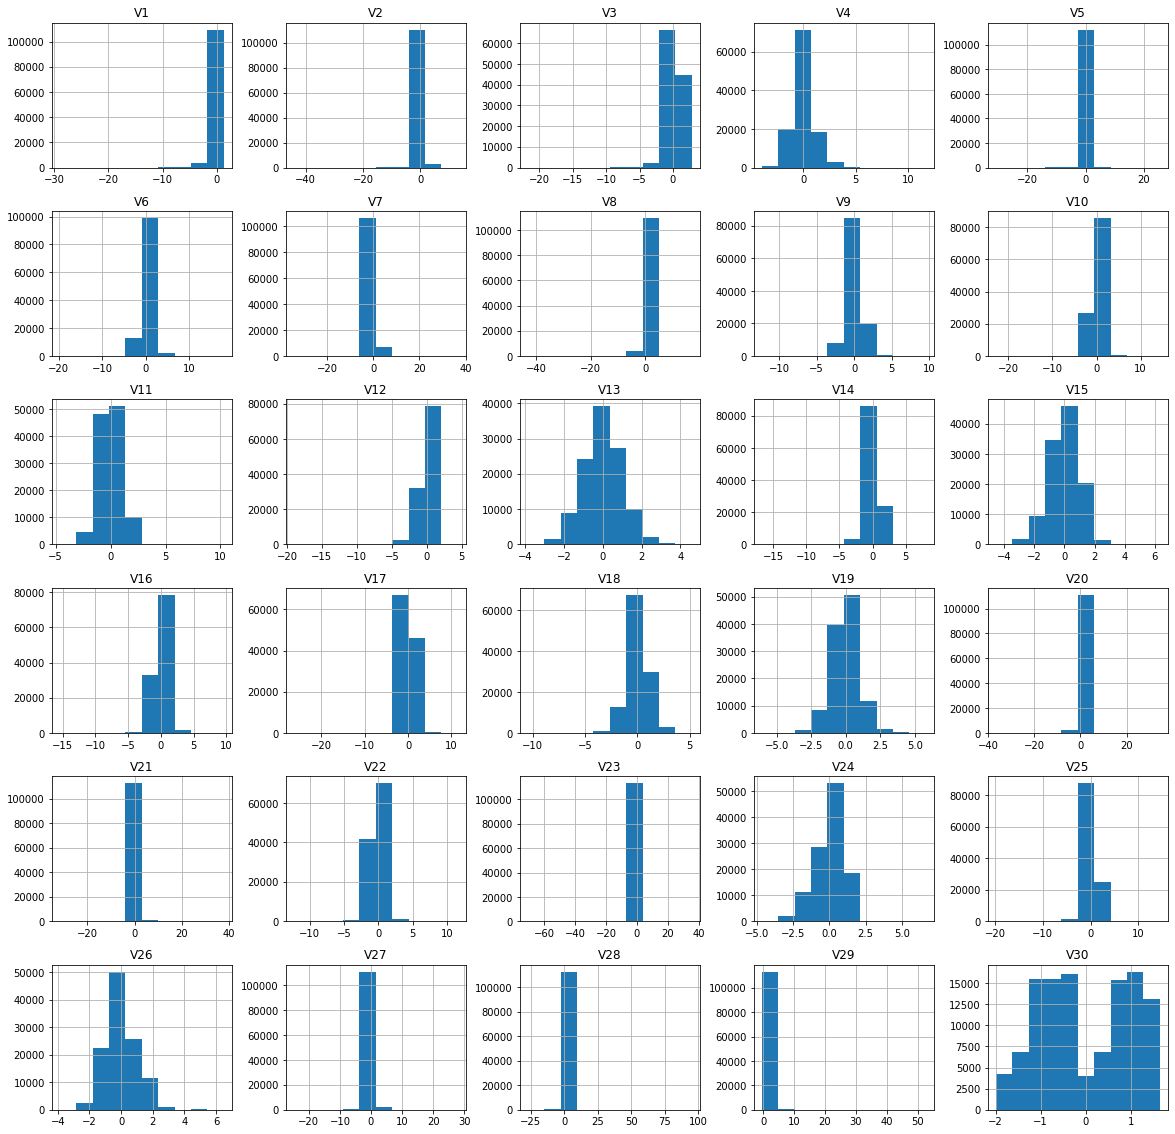

In [16]:
sdS_train_df.drop(columns=['ID']).hist(figsize = (20,20))
plt.show()

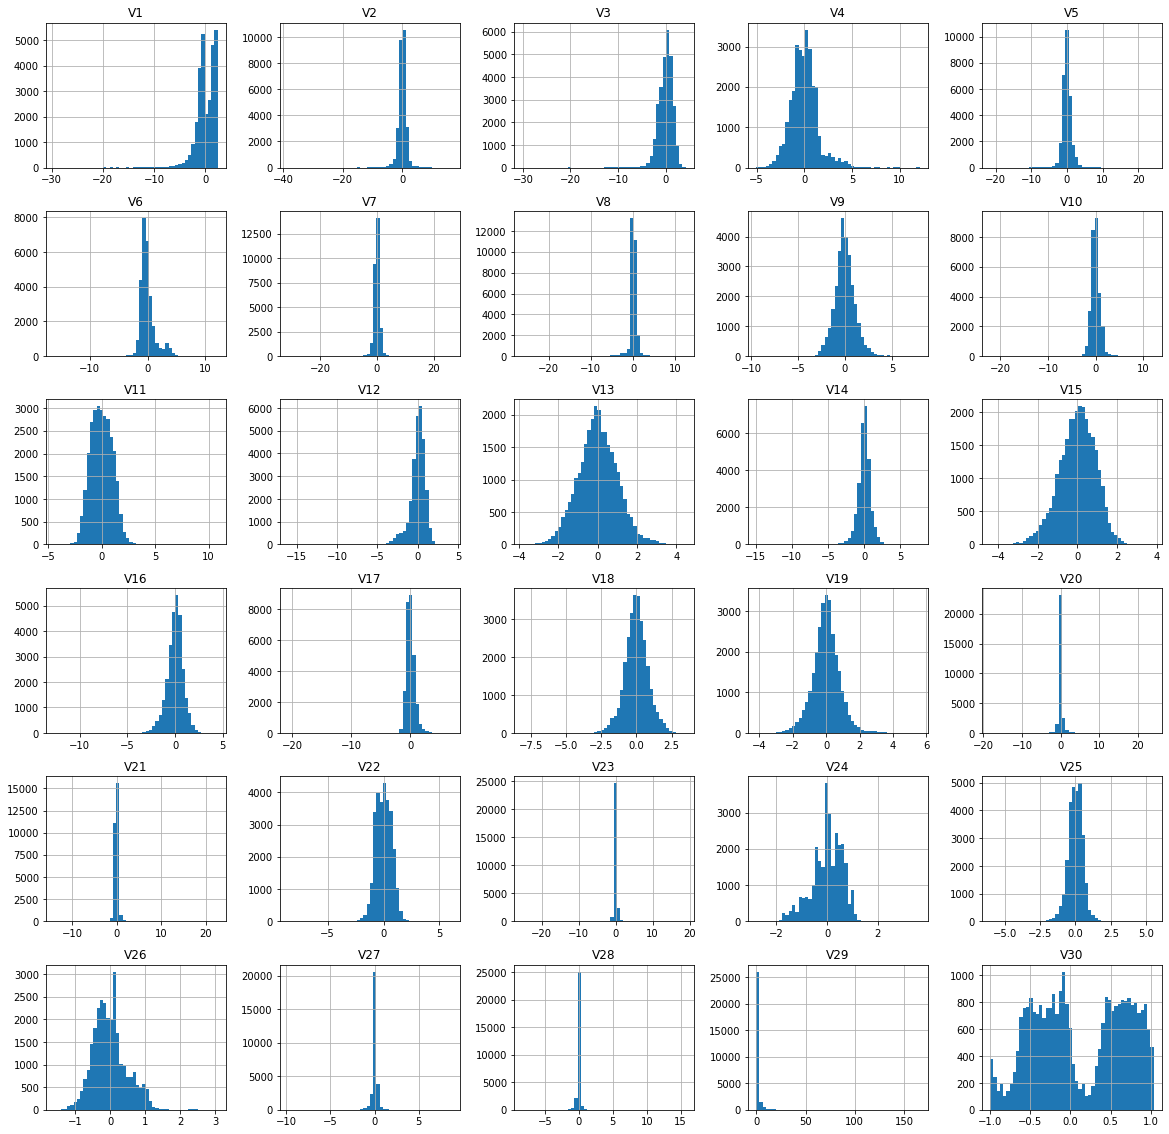

In [17]:
val_df.drop(columns=['ID', 'Class']).hist(bins = 50, figsize = (20,20))
plt.show()

## outliers 제거


In [18]:
remove_ol_train_df = train_df.copy()

In [19]:
def remove_outlier_test(df, column):
  fraud_column_data = df[column]
  quan_25 = np.percentile(fraud_column_data.values, 25)
  quan_75 = np.percentile(fraud_column_data.values, 75)

  iqr = quan_75 - quan_25
  iqr = iqr * 1.5
  lowest = quan_25 - iqr
  highest = quan_75 + iqr
  outlier_index = fraud_column_data[(fraud_column_data < lowest) | (fraud_column_data > highest)].index
  print(len(outlier_index))
  df.drop(outlier_index, axis=0, inplace=True)
  print(df.shape)
  return df

In [20]:
# sdS_train_df['V14'].shape

In [21]:
remove_outlier_test(remove_ol_train_df, 'V14')

5550
(108292, 31)


,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,3,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,-0.994972
1,4,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,-0.994972
2,6,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.256131,-0.994960
3,8,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0.262698,-0.994901
4,9,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0.994900,-0.994901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113836,284795,-1.266580,-0.400461,0.956221,-0.723919,1.531993,-1.788600,0.314741,0.004704,0.013857,-0.815911,-1.311976,-0.946753,-2.119626,0.609469,-0.348707,0.077871,-0.357628,-0.578977,-0.518738,-0.029539,-0.157831,-0.883365,0.088485,-0.076790,-0.095833,0.132720,-0.028468,0.126494,-0.294977,1.034845
113837,284796,-12.516732,10.187818,-8.476671,-2.510473,-4.586669,-1.394465,-3.632516,5.498583,4.893089,8.655320,-1.052365,2.834865,1.088141,1.288401,-0.931503,1.067864,0.586179,-0.085524,-0.571605,3.490065,-0.944759,-1.565026,0.890675,-1.253276,1.786717,0.320763,2.090712,1.232864,-0.169496,1.034857
113838,284797,1.884849,-0.143540,-0.999943,1.506772,-0.035300,-0.613638,0.190241,-0.249058,0.666458,0.120908,-1.134176,0.677729,0.345928,0.002019,-0.679626,-0.549982,-0.199950,-0.420551,-0.283278,-0.153997,0.144008,0.634646,-0.042114,-0.053206,0.316403,-0.461441,0.018265,-0.041068,0.530986,1.034881
113839,284798,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,-0.284708,-0.612982,-0.066655,-0.732987,0.237948,-0.293959,-0.245496,-0.174846,-0.891169,-0.290491,-0.139512,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,-0.230699,1.034904


In [22]:
remove_outlier_test(remove_ol_train_df, 'V17')

1461
(106831, 31)


,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,3,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,-0.994972
1,4,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,-0.994972
2,6,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.256131,-0.994960
3,8,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0.262698,-0.994901
4,9,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0.994900,-0.994901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113836,284795,-1.266580,-0.400461,0.956221,-0.723919,1.531993,-1.788600,0.314741,0.004704,0.013857,-0.815911,-1.311976,-0.946753,-2.119626,0.609469,-0.348707,0.077871,-0.357628,-0.578977,-0.518738,-0.029539,-0.157831,-0.883365,0.088485,-0.076790,-0.095833,0.132720,-0.028468,0.126494,-0.294977,1.034845
113837,284796,-12.516732,10.187818,-8.476671,-2.510473,-4.586669,-1.394465,-3.632516,5.498583,4.893089,8.655320,-1.052365,2.834865,1.088141,1.288401,-0.931503,1.067864,0.586179,-0.085524,-0.571605,3.490065,-0.944759,-1.565026,0.890675,-1.253276,1.786717,0.320763,2.090712,1.232864,-0.169496,1.034857
113838,284797,1.884849,-0.143540,-0.999943,1.506772,-0.035300,-0.613638,0.190241,-0.249058,0.666458,0.120908,-1.134176,0.677729,0.345928,0.002019,-0.679626,-0.549982,-0.199950,-0.420551,-0.283278,-0.153997,0.144008,0.634646,-0.042114,-0.053206,0.316403,-0.461441,0.018265,-0.041068,0.530986,1.034881
113839,284798,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,-0.284708,-0.612982,-0.066655,-0.732987,0.237948,-0.293959,-0.245496,-0.174846,-0.891169,-0.290491,-0.139512,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,-0.230699,1.034904


In [23]:
# for i in list(remove_ol_train_df.drop('ID', axis=1).columns):
#   print('<',i,'>')
#   remove_outlier_test(remove_ol_train_df, i)


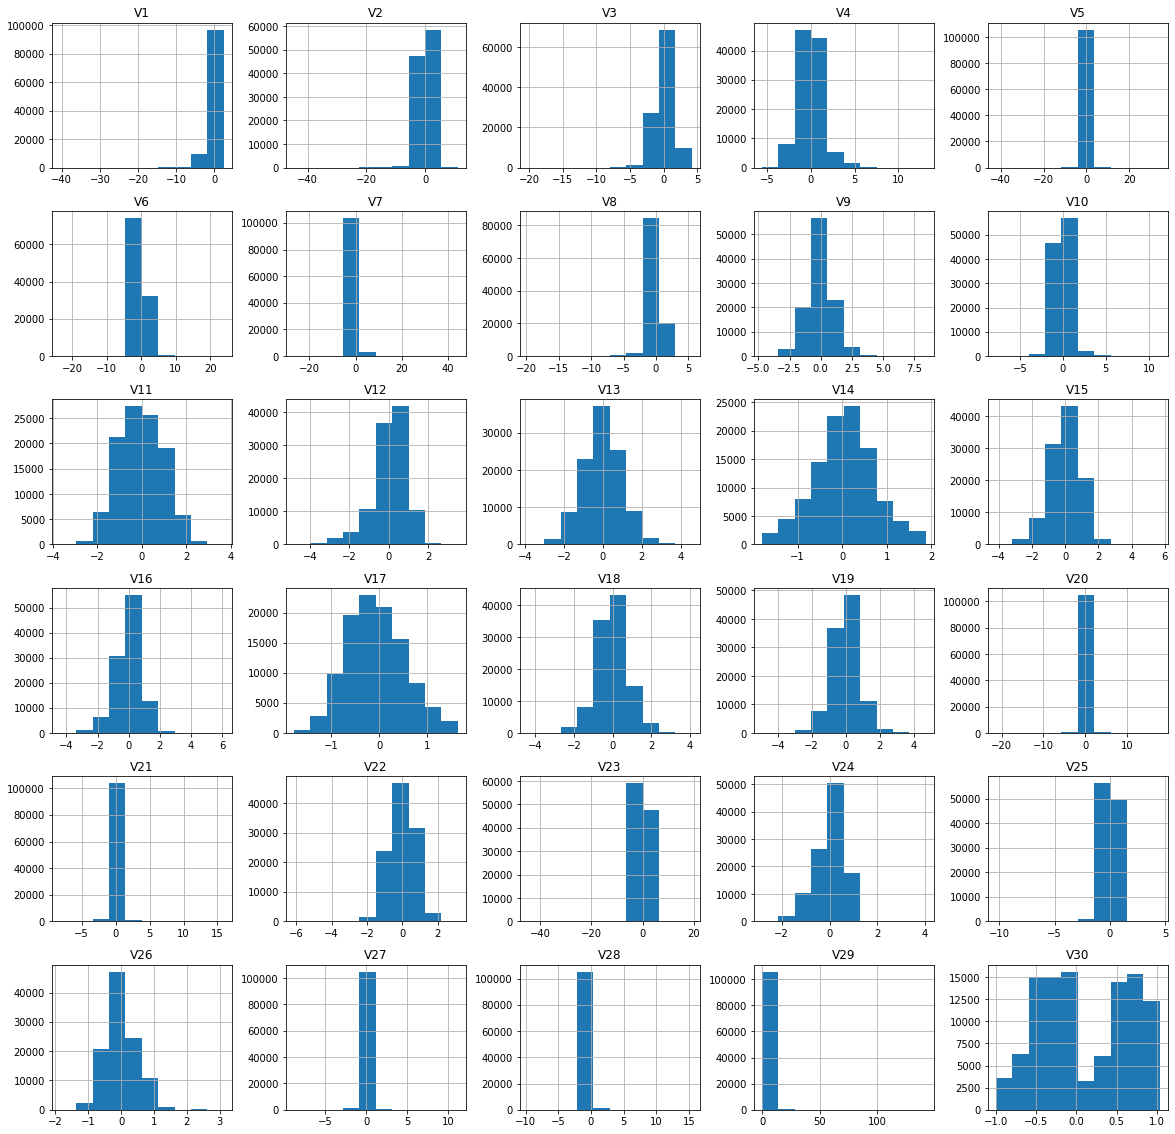

In [24]:
remove_ol_train_df.drop(columns=['ID']).hist(figsize = (20,20))
plt.show()

## Validation set 사기 거래 비율
#### (*) Validation set의 사기 거래 비율이 다른 데이터집합에서도 비슷하게 발생할 것이라고 가정

In [25]:
val_normal, val_fraud = val_df['Class'].value_counts()
val_contamination = val_fraud / val_normal
print(f'Validation contamination : [{val_contamination}]')

Validation contamination : [0.0010551491277433877]


## Model Define & Fit

In [44]:
# Train dataset은 Label이 존재하지 않음
train_df = train_df.drop(columns=['ID']) # Input Data

In [37]:
# Train dataset은 Label이 존재하지 않음
rbS_train_df = rbS_train_df.drop(columns=['ID']) # Input Data

In [38]:
# # Train dataset은 Label이 존재하지 않음
# train_df = train_df.drop(columns=['ID']) # Input Data

In [45]:
# 가설 설정 : Train dataset도 Validation dataset과 동일한 비율로 사기거래가 발생 했을 것이다. -> model parameter : contamination=val_contamination(=0.001055) 적용
model_originDF = EllipticEnvelope(support_fraction = 0.994, contamination = val_contamination, random_state = 42)
model_originDF.fit(train_df)

EllipticEnvelope(contamination=0.0010551491277433877, random_state=42,
                 support_fraction=0.994)

In [39]:
# 가설 설정 : Train dataset도 Validation dataset과 동일한 비율로 사기거래가 발생 했을 것이다. -> model parameter : contamination=val_contamination(=0.001055) 적용
model = EllipticEnvelope(support_fraction = 0.994, contamination = val_contamination, random_state = 42)
model.fit(rbS_train_df)

EllipticEnvelope(contamination=0.0010551491277433877, random_state=42,
                 support_fraction=0.994)

## Evaluation : Validation set

In [40]:
def get_pred_label(model_pred):
    # IsolationForest 모델 출력 (1:정상, -1:불량(사기)) 이므로 (0:정상, 1:불량(사기))로 Label 변환
    model_pred = np.where(model_pred == 1, 0, model_pred)
    model_pred = np.where(model_pred == -1, 1, model_pred)
    return model_pred

In [41]:
val_x = val_df.drop(columns=['ID', 'Class']) # Input Data
val_y = val_df['Class'] # Label

val_pred = model.predict(val_x) # model prediction
val_pred = get_pred_label(val_pred)
val_score = f1_score(val_y, val_pred, average='macro')
print(f'Validation F1 Score : [{val_score}]')
print(classification_report(val_y, val_pred))

Validation F1 Score : [0.9137051774467988]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.86      0.80      0.83        30

    accuracy                           1.00     28462
   macro avg       0.93      0.90      0.91     28462
weighted avg       1.00      1.00      1.00     28462



In [46]:
val_x = val_df.drop(columns=['ID', 'Class']) # Input Data
val_y = val_df['Class'] # Label

val_pred = model_originDF.predict(val_x) # model prediction
val_pred = get_pred_label(val_pred)
val_score = f1_score(val_y, val_pred, average='macro')
print(f'Validation F1 Score : [{val_score}]')
print(classification_report(val_y, val_pred))

Validation F1 Score : [0.8927516353661109]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.85      0.73      0.79        30

    accuracy                           1.00     28462
   macro avg       0.92      0.87      0.89     28462
weighted avg       1.00      1.00      1.00     28462



## Inference : Test set

In [31]:
test_df = pd.read_csv('./open/test.csv') # Train
test_df.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,AAAA0x1,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,-0.994983
1,AAAA0x2,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,-0.994983
2,AAAA0x5,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,-0.994960
3,AAAA0x7,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,-0.237686,-0.994937
4,AAAA0xc,0.384978,0.616109,-0.874300,-0.094019,2.924584,3.317027,0.470455,0.538247,-0.558895,0.309755,-0.259116,-0.326143,-0.090047,0.362832,0.928904,-0.129487,-0.809979,0.359985,0.707664,0.125992,0.049924,0.238422,0.009130,0.996710,-0.767315,-0.492208,0.042472,-0.054337,-0.167819,-0.994866


In [32]:
test_x = test_df.drop(columns=['ID'])

In [33]:
test_pred = model.predict(test_x) # model prediction
test_pred = get_pred_label(test_pred)

## Submission

In [34]:
submit = pd.read_csv('./open/sample_submission.csv')
submit.tail()

,ID,Class
142498,0x4587f,1
142499,0x45880,1
142500,0x45884,1
142501,0x45885,1
142502,0x45887,1


In [35]:
# submit['Class'] = test_pred
# submit.to_csv('./open/submit_file/[0722_remove_outlier_allFeature]submit.csv', index=False)